In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train = pd.read_json('train.json')

In [3]:
train.shape

(49352, 15)

In [4]:
train.head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street,low
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue,high
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street,low
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street,low


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
train.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [7]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


<AxesSubplot:>

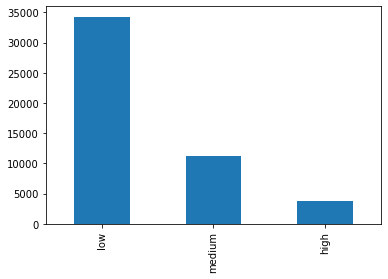

In [8]:
train.interest_level.value_counts().plot.bar()

In [9]:
train.groupby(by=('interest_level')).mean()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
interest_level,,,,,,
high,1.116176,1.546496,40.748007,7.017844e+06,-73.964613,2700.293045
low,1.238741,1.514759,40.739504,7.026373e+06,-73.951667,4176.599142
medium,1.163906,1.622050,40.745567,7.019098e+06,-73.965033,3158.767388


In [10]:
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['num_features'] = train['features'].apply(len)
train['num_photos'] = train['photos'].apply(len)
train['created'] = pd.to_datetime(train['created'])
train['created_year'] = train['created'].dt.year
train['created_month'] = train['created'].dt.month
train['created_day'] = train['created'].dt.day

In [11]:
num_cols = ['bathrooms', 
             'bedrooms', 
             'latitude', 
             'longitude', 
             'price',
             'num_photos', 
             'num_features', 
             'num_description_words',
             'created_year', 
             'created_month', 
             'created_day']


target_col = 'interest_level'

In [12]:
X = train[num_cols]
y = train[target_col]
X.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day
4,1.0,1,40.7108,-73.9539,2400,12,7,77,2016,6,16
6,1.0,2,40.7513,-73.9722,3800,6,6,131,2016,6,1
9,1.0,2,40.7575,-73.9625,3495,6,6,119,2016,6,14
10,1.5,3,40.7145,-73.9425,3000,5,0,95,2016,6,24
15,1.0,0,40.7439,-73.9743,2795,4,4,41,2016,6,28


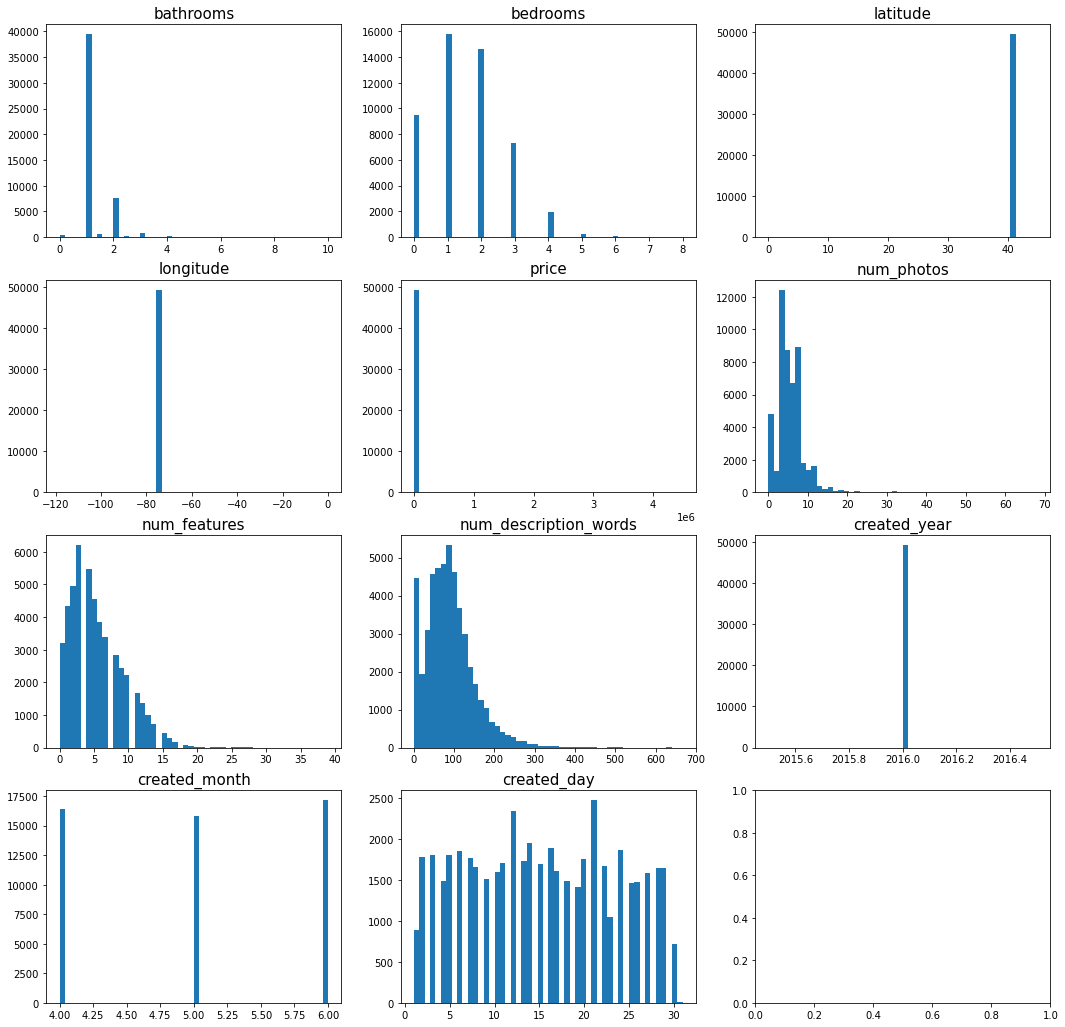

In [13]:
fig, ax = plt.subplots(4, 3, figsize=(18,18))
for n, col in enumerate(num_cols):
    ax = ax.flatten()
    ax[n].hist(train[col], bins=50)
    ax[n].set_title(col, size=15)
plt.show()

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [16]:
prepare_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_cols)])

full_pipeline = Pipeline([
        ("preparation", prepare_pipeline),
        ("linear", LogisticRegression(solver = 'liblinear', random_state=42))])

In [17]:
C_values_lst = [1000, 100, 10]

param_grid = [{'linear__penalty':['l1', 'l2'],
         'linear__C':C_values_lst}]

In [18]:
grid_search = GridSearchCV(full_pipeline, 
                          param_grid, 
                          verbose=5)

In [19]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_depth=15,bootstrap=True,random_state=42)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.6343753724117682

In [20]:
from catboost import CatBoostClassifier
import catboost

In [21]:
cat = CatBoostClassifier(random_seed=42, verbose=False)

In [22]:
cat.fit(X_train, y_train, use_best_model=True, eval_set=(X_val, y_val))

In [23]:
log_loss(y_train, cat.predict_proba(X_train)[:])

0.5017828039391756

In [24]:
log_loss(y_val, cat.predict_proba(X_val)[:])

0.6086627436825908

In [25]:
y_train_predicted = cat.predict_proba(X_train)[:]
y_val_predicted = cat.predict_proba(X_val)[:]

In [26]:
cat = catboost.CatBoostClassifier(n_estimators=500)
cat.fit(X_train, y_train)
y_train_predicted = cat.predict_proba(X_train)[:]
y_val_predicted = cat.predict_proba(X_val)[:]

Learning rate set to 0.171439
0:	learn: 0.9876713	total: 23.2ms	remaining: 11.6s
1:	learn: 0.9128972	total: 45ms	remaining: 11.2s
2:	learn: 0.8607243	total: 68.4ms	remaining: 11.3s
3:	learn: 0.8208959	total: 91.9ms	remaining: 11.4s
4:	learn: 0.7923691	total: 113ms	remaining: 11.2s
5:	learn: 0.7697136	total: 137ms	remaining: 11.3s
6:	learn: 0.7499349	total: 156ms	remaining: 11s
7:	learn: 0.7362599	total: 176ms	remaining: 10.8s
8:	learn: 0.7251855	total: 194ms	remaining: 10.6s
9:	learn: 0.7159703	total: 213ms	remaining: 10.4s
10:	learn: 0.7080739	total: 231ms	remaining: 10.3s
11:	learn: 0.7008181	total: 249ms	remaining: 10.1s
12:	learn: 0.6945214	total: 268ms	remaining: 10s
13:	learn: 0.6903183	total: 287ms	remaining: 9.97s
14:	learn: 0.6853630	total: 307ms	remaining: 9.94s
15:	learn: 0.6812473	total: 327ms	remaining: 9.88s
16:	learn: 0.6772263	total: 344ms	remaining: 9.78s
17:	learn: 0.6743015	total: 363ms	remaining: 9.71s
18:	learn: 0.6720371	total: 380ms	remaining: 9.62s
19:	learn: 0.

165:	learn: 0.5818166	total: 3.12s	remaining: 6.28s
166:	learn: 0.5815891	total: 3.14s	remaining: 6.26s
167:	learn: 0.5811738	total: 3.16s	remaining: 6.24s
168:	learn: 0.5809151	total: 3.18s	remaining: 6.22s
169:	learn: 0.5807484	total: 3.19s	remaining: 6.2s
170:	learn: 0.5804105	total: 3.21s	remaining: 6.18s
171:	learn: 0.5800785	total: 3.23s	remaining: 6.16s
172:	learn: 0.5797856	total: 3.25s	remaining: 6.15s
173:	learn: 0.5795281	total: 3.27s	remaining: 6.12s
174:	learn: 0.5793213	total: 3.29s	remaining: 6.1s
175:	learn: 0.5792420	total: 3.3s	remaining: 6.08s
176:	learn: 0.5789708	total: 3.32s	remaining: 6.06s
177:	learn: 0.5786094	total: 3.34s	remaining: 6.05s
178:	learn: 0.5783944	total: 3.36s	remaining: 6.03s
179:	learn: 0.5782522	total: 3.38s	remaining: 6.01s
180:	learn: 0.5780877	total: 3.4s	remaining: 5.99s
181:	learn: 0.5779679	total: 3.42s	remaining: 5.97s
182:	learn: 0.5777060	total: 3.43s	remaining: 5.95s
183:	learn: 0.5775159	total: 3.45s	remaining: 5.93s
184:	learn: 0.57

332:	learn: 0.5445360	total: 6.17s	remaining: 3.09s
333:	learn: 0.5443389	total: 6.18s	remaining: 3.07s
334:	learn: 0.5441331	total: 6.21s	remaining: 3.06s
335:	learn: 0.5438952	total: 6.22s	remaining: 3.04s
336:	learn: 0.5436298	total: 6.24s	remaining: 3.02s
337:	learn: 0.5434515	total: 6.26s	remaining: 3s
338:	learn: 0.5432537	total: 6.28s	remaining: 2.98s
339:	learn: 0.5431079	total: 6.3s	remaining: 2.96s
340:	learn: 0.5427955	total: 6.32s	remaining: 2.94s
341:	learn: 0.5426693	total: 6.33s	remaining: 2.92s
342:	learn: 0.5425351	total: 6.35s	remaining: 2.91s
343:	learn: 0.5423999	total: 6.37s	remaining: 2.89s
344:	learn: 0.5421623	total: 6.39s	remaining: 2.87s
345:	learn: 0.5420427	total: 6.41s	remaining: 2.85s
346:	learn: 0.5418922	total: 6.43s	remaining: 2.83s
347:	learn: 0.5416367	total: 6.45s	remaining: 2.81s
348:	learn: 0.5415163	total: 6.46s	remaining: 2.8s
349:	learn: 0.5413864	total: 6.48s	remaining: 2.78s
350:	learn: 0.5410427	total: 6.5s	remaining: 2.76s
351:	learn: 0.5409

497:	learn: 0.5178977	total: 9.2s	remaining: 36.9ms
498:	learn: 0.5176721	total: 9.21s	remaining: 18.5ms
499:	learn: 0.5176060	total: 9.23s	remaining: 0us


In [27]:
log_loss(y_train, y_train_predicted)

0.5176059709555646

In [28]:
log_loss(y_val, y_val_predicted)

0.6119022182448598

In [29]:
best_model = catboost.CatBoostClassifier(n_estimators=500, 
                                         learning_rate=0.171439)
best_model.fit(X_train, y_train)
y_train_predicted = cat.predict_proba(X_train)[:]
y_val_predicted = cat.predict_proba(X_val)[:]

0:	learn: 0.9876713	total: 19.1ms	remaining: 9.55s
1:	learn: 0.9128972	total: 37.4ms	remaining: 9.32s
2:	learn: 0.8607243	total: 56.8ms	remaining: 9.41s
3:	learn: 0.8208959	total: 75.6ms	remaining: 9.38s
4:	learn: 0.7923691	total: 94.1ms	remaining: 9.31s
5:	learn: 0.7697136	total: 113ms	remaining: 9.33s
6:	learn: 0.7499349	total: 132ms	remaining: 9.3s
7:	learn: 0.7362599	total: 152ms	remaining: 9.34s
8:	learn: 0.7251855	total: 168ms	remaining: 9.15s
9:	learn: 0.7159703	total: 186ms	remaining: 9.12s
10:	learn: 0.7080739	total: 204ms	remaining: 9.08s
11:	learn: 0.7008181	total: 225ms	remaining: 9.13s
12:	learn: 0.6945214	total: 243ms	remaining: 9.1s
13:	learn: 0.6903183	total: 261ms	remaining: 9.07s
14:	learn: 0.6853630	total: 282ms	remaining: 9.13s
15:	learn: 0.6812473	total: 304ms	remaining: 9.18s
16:	learn: 0.6772263	total: 321ms	remaining: 9.13s
17:	learn: 0.6743015	total: 340ms	remaining: 9.1s
18:	learn: 0.6720371	total: 358ms	remaining: 9.05s
19:	learn: 0.6695435	total: 376ms	remai

166:	learn: 0.5815891	total: 3.06s	remaining: 6.1s
167:	learn: 0.5811738	total: 3.08s	remaining: 6.08s
168:	learn: 0.5809151	total: 3.1s	remaining: 6.06s
169:	learn: 0.5807484	total: 3.11s	remaining: 6.04s
170:	learn: 0.5804105	total: 3.13s	remaining: 6.03s
171:	learn: 0.5800785	total: 3.15s	remaining: 6.01s
172:	learn: 0.5797856	total: 3.17s	remaining: 5.99s
173:	learn: 0.5795281	total: 3.19s	remaining: 5.97s
174:	learn: 0.5793213	total: 3.2s	remaining: 5.95s
175:	learn: 0.5792420	total: 3.22s	remaining: 5.93s
176:	learn: 0.5789708	total: 3.24s	remaining: 5.92s
177:	learn: 0.5786094	total: 3.26s	remaining: 5.9s
178:	learn: 0.5783944	total: 3.28s	remaining: 5.88s
179:	learn: 0.5782522	total: 3.3s	remaining: 5.86s
180:	learn: 0.5780877	total: 3.31s	remaining: 5.84s
181:	learn: 0.5779679	total: 3.33s	remaining: 5.82s
182:	learn: 0.5777060	total: 3.35s	remaining: 5.8s
183:	learn: 0.5775159	total: 3.37s	remaining: 5.79s
184:	learn: 0.5772866	total: 3.39s	remaining: 5.77s
185:	learn: 0.5771

334:	learn: 0.5441331	total: 6.1s	remaining: 3.01s
335:	learn: 0.5438952	total: 6.12s	remaining: 2.99s
336:	learn: 0.5436298	total: 6.14s	remaining: 2.97s
337:	learn: 0.5434515	total: 6.16s	remaining: 2.95s
338:	learn: 0.5432537	total: 6.18s	remaining: 2.93s
339:	learn: 0.5431079	total: 6.2s	remaining: 2.92s
340:	learn: 0.5427955	total: 6.21s	remaining: 2.9s
341:	learn: 0.5426693	total: 6.23s	remaining: 2.88s
342:	learn: 0.5425351	total: 6.25s	remaining: 2.86s
343:	learn: 0.5423999	total: 6.27s	remaining: 2.84s
344:	learn: 0.5421623	total: 6.29s	remaining: 2.83s
345:	learn: 0.5420427	total: 6.31s	remaining: 2.81s
346:	learn: 0.5418922	total: 6.33s	remaining: 2.79s
347:	learn: 0.5416367	total: 6.35s	remaining: 2.77s
348:	learn: 0.5415163	total: 6.36s	remaining: 2.75s
349:	learn: 0.5413864	total: 6.38s	remaining: 2.73s
350:	learn: 0.5410427	total: 6.4s	remaining: 2.72s
351:	learn: 0.5409190	total: 6.42s	remaining: 2.7s
352:	learn: 0.5407228	total: 6.44s	remaining: 2.68s
353:	learn: 0.540

499:	learn: 0.5176060	total: 9.11s	remaining: 0us


In [30]:
best_model = best_model

In [31]:
test = pd.read_json('test.json')

In [32]:
test.shape

(74659, 14)

In [33]:
test.head(10)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
7,2.0,2,3a956bd42c50f06ac84cf072fc514f5f,2016-06-28 03:44:52,Beautiful 2 bedroom unit with 2 full bathrooms...,W 42nd St.,"[Cats Allowed, Dogs Allowed, No Fee, Doorman, ...",40.7610,7225206,-73.9983,93e03c5179b8f3229fc1c63c0f75d11b,[https://photos.renthop.com/2/7225206_6b8ac259...,4990,650 W 42nd St.
8,3.5,4,628ccc8b016abf804bdf7ae77167cfe3,2016-06-22 05:14:51,,Irving Pl,"[Elevator, Cats Allowed, Dogs Allowed]",40.7358,7200075,-73.9877,7422eabb4c6c3448c000f7be84e5c1b8,[https://photos.renthop.com/2/7200075_abfbded7...,20000,47 Irving Pl
11,1.0,0,52ac9f39766292e9bc3e7eddd32f1d37,2016-06-12 02:24:10,"LOW FEE, AMAZING OVER-SIZED STUDIO IN A LUXURY...",Third Ave,"[Doorman, Elevator, Laundry in Building, Hardw...",40.7814,7145074,-73.9507,5642b01c61afd6b54601365aedc96b68,[https://photos.renthop.com/2/7145074_025b6af2...,2150,1619 Third Ave
12,2.0,4,44c1ee5d0dcc2c9ee7c3e9e53aab4276,2016-06-21 06:50:23,,Rivington St,[No Fee],40.7216,7193645,-73.9927,64249f81378907ae7cf65e8ccb4bd8dc,[https://photos.renthop.com/2/7193645_61e67bb1...,6500,8 Rivington St
13,1.0,1,9ac474eaddc388c582409cba637038a3,2016-06-12 07:35:04,,West 37th Street,"[Fitness Center, Cats Allowed, Dogs Allowed]",40.7553,7147703,-73.9953,11215cda1d873d587dcdf455001c1b84,[https://photos.renthop.com/2/7147703_1fb336cd...,3365,400 West 37th Street


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [35]:
test.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [36]:
test['num_description_words'] = test['description'].apply(lambda x: len(x.split(' ')))
test['num_features'] = test['features'].apply(len)
test['num_photos'] = test['photos'].apply(len)
test['created'] = pd.to_datetime(test['created'])
test['created_year'] = test['created'].dt.year
test['created_month'] = test['created'].dt.month
test['created_day'] = test['created'].dt.day

In [37]:
X_test = test[num_cols]
y_test = best_model.predict_proba(X_test)

In [38]:
labels2idx = {label: i for i, label in enumerate(clf.classes_)}
labels2idx

{'high': 0, 'low': 1, 'medium': 2}

In [39]:
sub = pd.DataFrame()
sub["listing_id"] = test["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y_test[:, labels2idx[label]]
sub.to_csv("submission_two_sigma.csv", index=False)

In [40]:
 Kaggle Public Score 0.61772

SyntaxError: invalid syntax (Temp/ipykernel_13392/644328426.py, line 1)